<a href="https://colab.research.google.com/github/projet-ML/COVID/blob/master/codes/sir_deterministe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [0]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

Résultat de la simulation avec N = 10000,
 gamma= 1/5 et  beta = 1, figure 1.5

In [0]:
# première simulation
N = 10000 # pouplation totale
beta = 1  # une personne infectée infecte une autre personne par jour
gamma = 1.0 / 5

S0, I0, R0 = 9995, 5, 0  # conditions initiales: 5 personnes infectées

In [0]:
t = np.linspace(0, 50, 100) # Grille des points représentant le temps (en jours)
y0 = S0, I0, R0 # Vecteur des conditions initiales

# Intégrer les équations du SIR sur la grille de temps t
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
print("S(100)=",S[-1])
print("I(100)=",I[-1])
print("R(100)=",R[-1])

S(100)= 69.89460334435344
I(100)= 4.40148763804317
R(100)= 9925.703909017615


In [0]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(15,5))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

Résultat de la première simulation


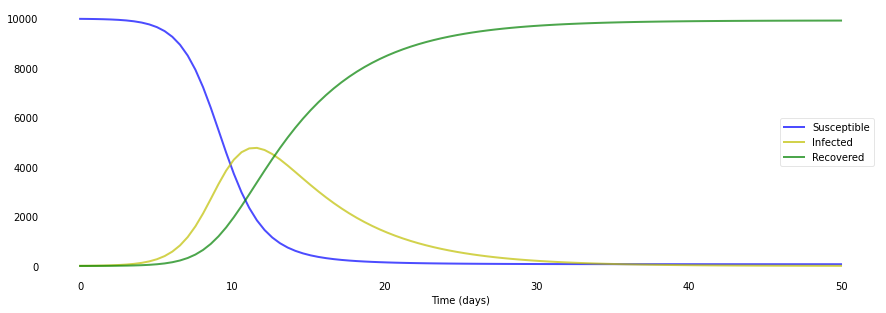

In [0]:
print("Résultat de la première simulation")
plotsir(t, S, I, R)

Résultat de la simulation avec N = 10000,
 gamma= 1/5 et beta = 0.5, figure 1.6

In [0]:
# seconde simulation
N = 10000
beta = 0.5  # infected person infects 1 other person per day
gamma = 1.0 / 5

S0, I0, R0 = 9995, 5, 0  # initial conditions: one infected, rest susceptible

t = np.linspace(0, 100, 100) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
print("S(100)=",S[-1])
print("I(100)=",I[-1])
print("R(100)=",R[-1])

S(100)= 1072.864343832681
I(100)= 0.12384796711228202
R(100)= 8927.011808200194


Résultat de la seconde simulation


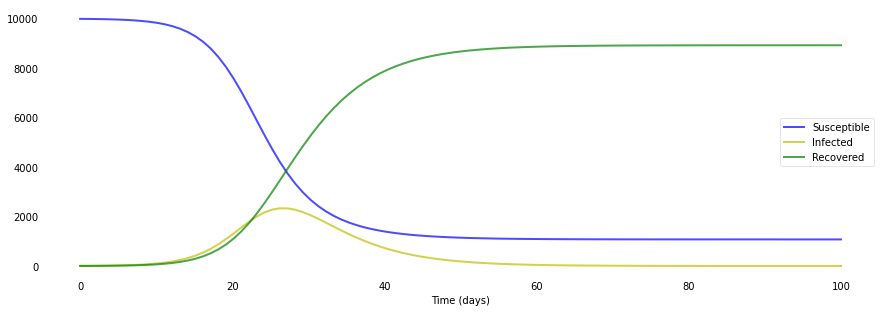

In [0]:
print("Résultat de la seconde simulation")
plotsir(t, S, I, R)